In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!wget https://www.dropbox.com/s/rbajpdlh7efkdo1/male_female_face_images.zip
!unzip -q /content/drive/MyDrive/GAN/male_female_face_images.zip

In [ ]:
!pip install -q --upgrade torch_snippets
from torch_snippets import *
device = "cuda" if torch.cuda.is_available() else "cpu"
from torchvision.utils import make_grid
from torch_snippets import *
from PIL import Image
import torchvision
from torchvision import transforms
import torchvision.utils as vutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.9 MB/s eta 0

In [ ]:
female_images = Glob('/content/females/*.jpg')
male_images = Glob('/content/males/*.jpg')

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
!mkdir cropped_faces_female
!mkdir cropped_faces_male
for i in range(len(female_images)):
    img = read(female_images[i],1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        img2 = img[y:(y+h),x:(x+w),:]
    cv2.imwrite('cropped_faces_female/'+str(i)+'.jpg',cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))
for i in range(len(male_images)):
    img = read(male_images[i],1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        img2 = img[y:(y+h),x:(x+w),:]
    cv2.imwrite('cropped_faces_male/'+str(i)+'.jpg',cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))

In [ ]:
# Create directories to store cropped faces of females and males
!mkdir cropped_faces_female
!mkdir cropped_faces_male

# Iterate over each female image
for i in range(len(female_images)):
    # Read the current female image
    img = read(female_images[i], 1)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image using the face cascade classifier
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Iterate over each detected face
    for (x, y, w, h) in faces:
        # Crop the detected face region from the original image
        img2 = img[y:(y+h), x:(x+w), :]

    # Write the cropped face image to the 'cropped_faces_female' directory
    cv2.imwrite('cropped_faces_female/' + str(i) + '.jpg', cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))

# Iterate over each male image
for i in range(len(male_images)):
    # Read the current male image
    img = read(male_images[i], 1)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image using the face cascade classifier
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Iterate over each detected face
    for (x, y, w, h) in faces:
        # Crop the detected face region from the original image
        img2 = img[y:(y+h), x:(x+w), :]

    # Write the cropped face image to the 'cropped_faces_male' directory
    cv2.imwrite('cropped_faces_male/' + str(i) + '.jpg', cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))


In [ ]:
transform=transforms.Compose([
                               transforms.Resize(64),
                               transforms.CenterCrop(64),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ])

In [ ]:
class Faces(Dataset):
    def __init__(self, folders):
        super().__init__()
        self.folderfemale = folders[0]
        self.foldermale = folders[1]
        self.images=sorted(Glob(self.folderfemale))+sorted(Glob(self.foldermale))
    def __len__(self):
        return len(self.images)
    def __getitem__(self, ix):
        image_path = self.images[ix]
        image = Image.open(image_path)
        image = transform(image)
        gender = np.where('female' in str(image_path),1,0)
        return image, torch.tensor(gender).long()

In [ ]:
ds = Faces(folders=['cropped_faces_female','cropped_faces_male'])
dataloader = DataLoader(ds, batch_size=64, shuffle=True, num_workers=8)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, emb_size=32):
        super(Discriminator, self).__init__()
        self.emb_size = 32
        self.label_embeddings = nn.Embedding(2, self.emb_size)
        self.model = nn.Sequential(
            nn.Conv2d(3,64,4,2,1,bias=False),
            nn.LeakyReLU(0.2,inplace=True),
            nn.Conv2d(64,64*2,4,2,1,bias=False),
            nn.BatchNorm2d(64*2),
            nn.LeakyReLU(0.2,inplace=True),
            nn.Conv2d(64*2,64*4,4,2,1,bias=False),
            nn.BatchNorm2d(64*4),
            nn.LeakyReLU(0.2,inplace=True),
            nn.Conv2d(64*4,64*8,4,2,1,bias=False),
            nn.BatchNorm2d(64*8),
            nn.LeakyReLU(0.2,inplace=True),
            nn.Conv2d(64*8,64,4,2,1,bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2,inplace=True),
            nn.Flatten()
        )
        self.model2 = nn.Sequential(
            nn.Linear(288,100),
            nn.LeakyReLU(0.2,inplace=True),
            nn.Linear(100,1),
            nn.Sigmoid()
        )
        self.apply(weights_init)
    def forward(self, input, labels):
        x = self.model(input)
        y = self.label_embeddings(labels)
        input = torch.cat([x, y], 1)
        final_output = self.model2(input)
        return final_output

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, emb_size=32):
        super(Discriminator, self).__init__()

        # Initialize the Discriminator class with an embedding size of 32
        self.emb_size = 32

        # Define an embedding layer to embed binary labels (0 or 1) into an embedding space
        self.label_embeddings = nn.Embedding(2, self.emb_size)

        # Define the convolutional layers for feature extraction
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),   # First convolutional layer
            nn.LeakyReLU(0.2, inplace=True),        # Apply LeakyReLU activation function
            nn.Conv2d(64, 64*2, 4, 2, 1, bias=False),  # Second convolutional layer
            nn.BatchNorm2d(64*2),                    # Apply batch normalization
            nn.LeakyReLU(0.2, inplace=True),        # Apply LeakyReLU activation function
            nn.Conv2d(64*2, 64*4, 4, 2, 1, bias=False),  # Third convolutional layer
            nn.BatchNorm2d(64*4),                    # Apply batch normalization
            nn.LeakyReLU(0.2, inplace=True),        # Apply LeakyReLU activation function
            nn.Conv2d(64*4, 64*8, 4, 2, 1, bias=False),  # Fourth convolutional layer
            nn.BatchNorm2d(64*8),                    # Apply batch normalization
            nn.LeakyReLU(0.2, inplace=True),        # Apply LeakyReLU activation function
            nn.Conv2d(64*8, 64, 4, 2, 1, bias=False),  # Fifth convolutional layer
            nn.BatchNorm2d(64),                      # Apply batch normalization
            nn.LeakyReLU(0.2, inplace=True),        # Apply LeakyReLU activation function
            nn.Flatten()                             # Flatten the output tensor
        )

        # Define the fully connected layers for classification
        self.model2 = nn.Sequential(
            nn.Linear(288, 100),                     # Fully connected layer with input size 288 and output size 100
            nn.LeakyReLU(0.2, inplace=True),        # Apply LeakyReLU activation function
            nn.Linear(100, 1),                       # Fully connected layer with input size 100 and output size 1
            nn.Sigmoid()                             # Apply Sigmoid activation function to output probability
        )

        # Initialize the weights of the discriminator using a custom initialization function
        self.apply(weights_init)

    def forward(self, input, labels):
        # Forward pass through the convolutional layers
        x = self.model(input)

        # Embed the binary labels into the embedding space
        y = self.label_embeddings(labels)

        # Concatenate the features from convolutional layers and the label embeddings
        input = torch.cat([x, y], 1) #concatenates tensors x and y along their second dimension, combining their features horizontally.

        # Forward pass through the fully connected layers for final classification
        final_output = self.model2(input)

        # Return the final output
        return final_output


In [ ]:
!pip install torch_summary
from torchsummary import summary
discriminator = Discriminator().to(device)
summary(discriminator,torch.zeros(32,3,64,64).to(device), torch.zeros(32).long().to(device));

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 256]                 --
|    └─Conv2d: 2-1                       [-1, 64, 32, 32]          3,072
|    └─LeakyReLU: 2-2                    [-1, 64, 32, 32]          --
|    └─Conv2d: 2-3                       [-1, 128, 16, 16]         131,072
|    └─BatchNorm2d: 2-4                  [-1, 128, 16, 16]         256
|    └─LeakyReLU: 2-5                    [-1, 128, 16, 16]         --
|    └─Conv2d: 2-6                       [-1, 256, 8, 8]           524,288
|    └─BatchNorm2d: 2-7                  [-1, 256, 8, 8]           512
|    └─LeakyReLU: 2-8                    [-1, 256, 8, 8]           --
|    └─Conv2d: 2-9                       [-1, 512, 4, 4]           2,097,152
|    └─BatchNorm2d: 2-10                 [-1, 512, 4, 4]           1,024
|    └─LeakyReLU: 2-11                   [-1, 512, 4, 4]           --
|    └─Conv2d: 2-12                      [-1, 64, 2, 2]     

In [ ]:
class Generator(nn.Module):
    def __init__(self, emb_size=32):
        super(Generator,self).__init__()
        self.emb_size = emb_size
        self.label_embeddings = nn.Embedding(2, self.emb_size)
        self.model = nn.Sequential(
            nn.ConvTranspose2d(100+self.emb_size,64*8,4,1,0,bias=False),
            nn.BatchNorm2d(64*8),
            nn.ReLU(True),
            nn.ConvTranspose2d(64*8,64*4,4,2,1,bias=False),
            nn.BatchNorm2d(64*4),
            nn.ReLU(True),
            nn.ConvTranspose2d(64*4,64*2,4,2,1,bias=False),
            nn.BatchNorm2d(64*2),
            nn.ReLU(True),
            nn.ConvTranspose2d(64*2,64,4,2,1,bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64,3,4,2,1,bias=False),
            nn.Tanh()
        )
        self.apply(weights_init)
    def forward(self,input_noise,labels):
        label_embeddings = self.label_embeddings(labels).view(len(labels), self.emb_size, 1, 1)
        input = torch.cat([input_noise, label_embeddings], 1)
        return self.model(input)

In [ ]:
import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, emb_size=32):
        # Initialize the Generator class and set up the model layers
        super(Generator, self).__init__()
        self.emb_size = emb_size

        # Define an embedding layer to convert labels into embeddings
        # 2 is the number of classes, emb_size is the size of the embedding vector for each class
        self.label_embeddings = nn.Embedding(2, self.emb_size)

        # Define the generator model using a sequential container
        self.model = nn.Sequential(
            # First transposed convolutional layer
            # Input: Noise vector + label embedding, Output: Feature maps
            nn.ConvTranspose2d(100 + self.emb_size, 64 * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(64 * 8),  # Batch normalization layer
            nn.ReLU(True),  # ReLU activation function

            # Second transposed convolutional layer
            nn.ConvTranspose2d(64 * 8, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),  # Batch normalization layer
            nn.ReLU(True),  # ReLU activation function

            # Third transposed convolutional layer
            nn.ConvTranspose2d(64 * 4, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),  # Batch normalization layer
            nn.ReLU(True),  # ReLU activation function

            # Fourth transposed convolutional layer
            nn.ConvTranspose2d(64 * 2, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),  # Batch normalization layer
            nn.ReLU(True),  # ReLU activation function

            # Output layer: Transposed convolutional layer
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()  # Tanh activation function to output values in the range [-1, 1]
        )

        # Apply weight initialization to the model
        self.apply(weights_init)

    def forward(self, input_noise, labels):
        # Forward pass through the generator

        # Convert labels to embeddings and reshape to match the dimensions of input_noise
        label_embeddings = self.label_embeddings(labels).view(len(labels), self.emb_size, 1, 1)

        # Concatenate the input noise and the label embeddings along the channel dimension
        input = torch.cat([input_noise, label_embeddings], 1)

        # Pass the concatenated tensor through the generator model to produce the output
        return self.model(input)


In [ ]:
generator = Generator().to(device)
summary(generator,torch.zeros(32,100,1,1).to(device), torch.zeros(32).long().to(device));

Layer (type:depth-idx)                   Output Shape              Param #
├─Embedding: 1-1                         [-1, 32]                  64
├─Sequential: 1-2                        [-1, 3, 64, 64]           --
|    └─ConvTranspose2d: 2-1              [-1, 512, 4, 4]           1,081,344
|    └─BatchNorm2d: 2-2                  [-1, 512, 4, 4]           1,024
|    └─ReLU: 2-3                         [-1, 512, 4, 4]           --
|    └─ConvTranspose2d: 2-4              [-1, 256, 8, 8]           2,097,152
|    └─BatchNorm2d: 2-5                  [-1, 256, 8, 8]           512
|    └─ReLU: 2-6                         [-1, 256, 8, 8]           --
|    └─ConvTranspose2d: 2-7              [-1, 128, 16, 16]         524,288
|    └─BatchNorm2d: 2-8                  [-1, 128, 16, 16]         256
|    └─ReLU: 2-9                         [-1, 128, 16, 16]         --
|    └─ConvTranspose2d: 2-10             [-1, 64, 32, 32]          131,072
|    └─BatchNorm2d: 2-11                 [-1, 64, 32, 32

In [ ]:
def noise(size):
    n = torch.randn(size, 100, 1, 1, device=device)
    return n.to(device)

In [ ]:
def discriminator_train_step(real_data, real_labels, fake_data, fake_labels):
    d_optimizer.zero_grad()
    prediction_real = discriminator(real_data, real_labels)
    error_real = loss(prediction_real, torch.ones(len(real_data), 1).to(device))
    error_real.backward()
    prediction_fake = discriminator(fake_data, fake_labels)
    error_fake = loss(prediction_fake, torch.zeros(len(fake_data), 1).to(device))
    error_fake.backward()
    d_optimizer.step()
    return error_real + error_fake

In [ ]:
def generator_train_step(fake_data, fake_labels):
    g_optimizer.zero_grad()
    prediction = discriminator(fake_data, fake_labels)
    error = loss(prediction, torch.ones(len(fake_data), 1).to(device))
    error.backward()
    g_optimizer.step()
    return error

In [ ]:
discriminator = Discriminator().to(device)
generator = Generator().to(device)
loss = nn.BCELoss()
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
fixed_noise = torch.randn(64, 100, 1, 1, device=device)
fixed_fake_labels = torch.LongTensor([0]*(len(fixed_noise)//2) + [1]*(len(fixed_noise)//2)).to(device)
loss = nn.BCELoss()
n_epochs = 2 #25
img_list = []

EPOCH: 1.000  g_loss: 3.168  d_loss: 0.419  (2559.32s - 2559.32s remaining)


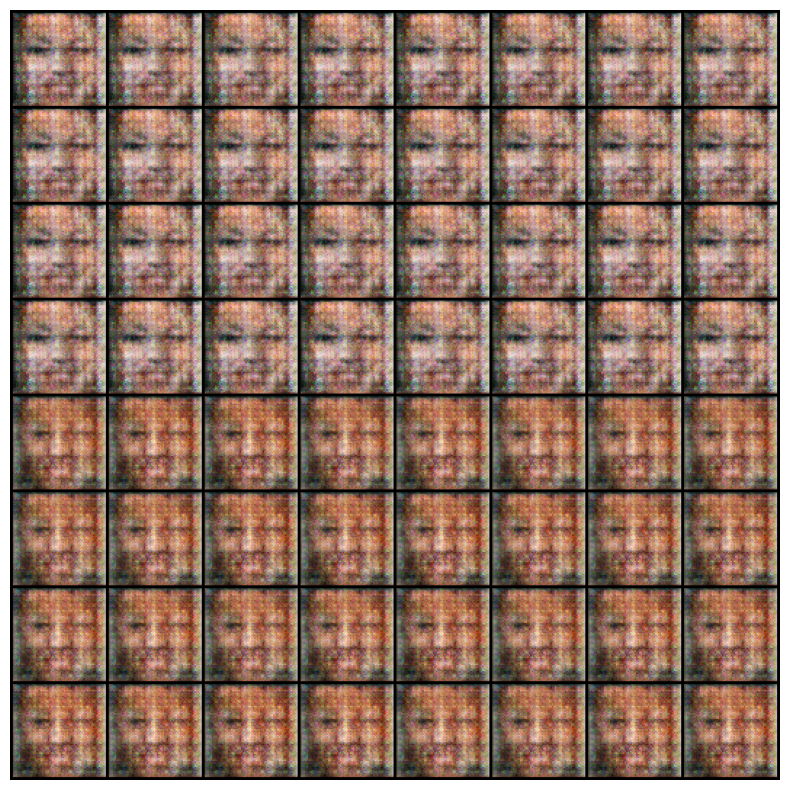

EPOCH: 2.000  g_loss: 4.174  d_loss: 0.492  (5137.46s - 0.00s remaining)


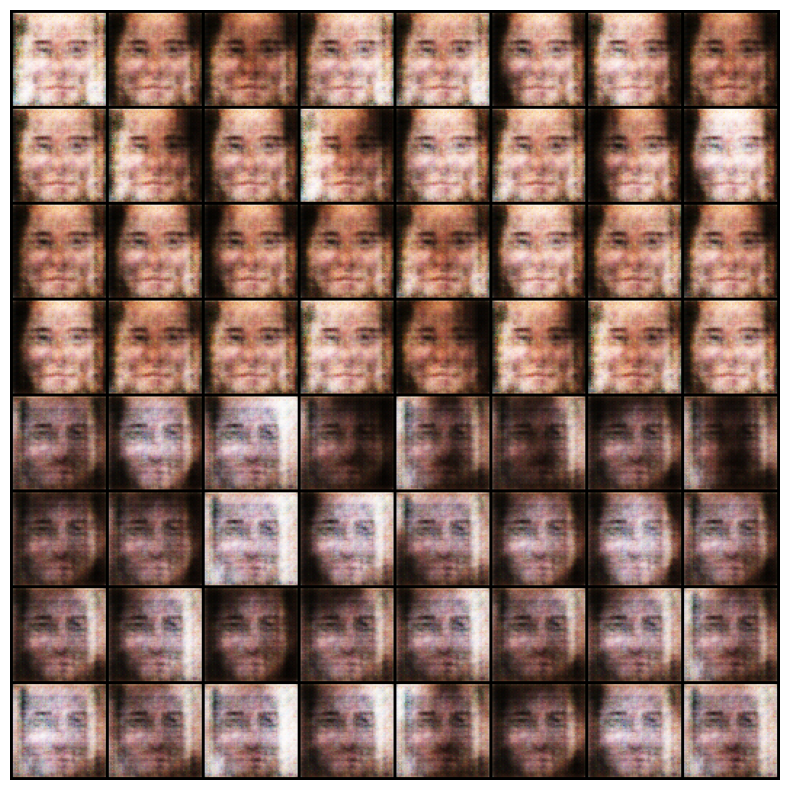

In [ ]:
log = Report(n_epochs)
for epoch in range(n_epochs):
    N = len(dataloader)
    for bx, (images, labels) in enumerate(dataloader):
        real_data, real_labels = images.to(device), labels.to(device)
        fake_labels = torch.LongTensor(np.random.randint(0, 2, len(real_data))).to(device)
        fake_data = generator(noise(len(real_data)), fake_labels)
        fake_data = fake_data.detach()
        d_loss = discriminator_train_step(real_data, real_labels, fake_data, fake_labels)
        fake_labels = torch.LongTensor(np.random.randint(0, 2, len(real_data))).to(device)
        fake_data = generator(noise(len(real_data)), fake_labels).to(device)
        g_loss = generator_train_step(fake_data, fake_labels)
        pos = epoch + (1+bx)/N
        log.record(pos, d_loss=d_loss.detach(), g_loss=g_loss.detach(), end='\r')
    log.report_avgs(epoch+1)
    with torch.no_grad():
        fake = generator(fixed_noise, fixed_fake_labels).detach().cpu()
        imgs = vutils.make_grid(fake, padding=2, normalize=True).permute(1,2,0)
        img_list.append(imgs)
        show(imgs, sz=10)
# 42.65 minits for one epoch

In [ ]:
# Initialize a log to track the progress of the training over n_epochs
log = Report(n_epochs)

# Start the training loop for the specified number of epochs
for epoch in range(n_epochs):
    # Get the total number of batches in the dataloader
    N = len(dataloader)

    # Loop over each batch of data
    for bx, (images, labels) in enumerate(dataloader):
        # Move the real images and labels to the specified device (CPU or GPU)
        real_data, real_labels = images.to(device), labels.to(device)

        # Generate random labels for the fake data
        fake_labels = torch.LongTensor(np.random.randint(0, 2, len(real_data))).to(device)

        # Generate fake data using the generator with the random noise and fake labels
        fake_data = generator(noise(len(real_data)), fake_labels)

        # Detach the fake data so that its gradients are not tracked during the discriminator's update
        fake_data = fake_data.detach()

        # Train the discriminator with the real and fake data, and get the discriminator loss
        d_loss = discriminator_train_step(real_data, real_labels, fake_data, fake_labels)

        # Generate new random labels for the fake data
        fake_labels = torch.LongTensor(np.random.randint(0, 2, len(real_data))).to(device)

        # Generate fake data again using the generator with the new random noise and fake labels
        fake_data = generator(noise(len(real_data)), fake_labels).to(device)

        # Train the generator to improve its performance in generating realistic data, and get the generator loss
        g_loss = generator_train_step(fake_data, fake_labels)

        # Calculate the current position in terms of epochs and batches
        pos = epoch + (1 + bx) / N

        # Record the discriminator and generator losses for the current position
        log.record(pos, d_loss=d_loss.detach(), g_loss=g_loss.detach(), end='\r')

    # Report the average losses for the current epoch
    log.report_avgs(epoch + 1)

    # Generate and visualize the fake images using the fixed noise and fixed fake labels for monitoring progress
    with torch.no_grad():
        fake = generator(fixed_noise, fixed_fake_labels).detach().cpu()
        imgs = vutils.make_grid(fake, padding=2, normalize=True).permute(1, 2, 0)
        img_list.append(imgs)
        show(imgs, sz=10)
